In [61]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics  import silhouette_score
from sklearn.cluster import KMeans

1. Dans scikit-learn, importe le dataset Iris. Il contient 3 espèces de fleurs (des iris) suivant leur longueur et largeur de pétale et de sépale.

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2. Entraîne ton modèle pour qu’il trouve 3 clusters à partir des 4 colonnes numériques.

In [34]:
#choix des 4 colonnes
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [50]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [51]:
#normalization
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [52]:
#entrainement du modèle pour 3 clusters
modelKM = KMeans(n_clusters=3).fit(X_scaled)

3. Produis une visualisation comparant le dataset de base avec les classes générées par le K-means en t’inspirant de cette image. Tu peux prendre 2 dimensions de ton choix parmi les 4.

*    Sur le graphique de gauche, tu dois afficher les points avec 
des couleurs différentes pour chaque cluster d'appartenance, ainsi que le centre de chaque cluster bien en évidence (ici les croix vertes).
*    Sur le graphique de droite, tu dois afficher les points avec des couleurs différentes correspondant à leur espèce d'iris species


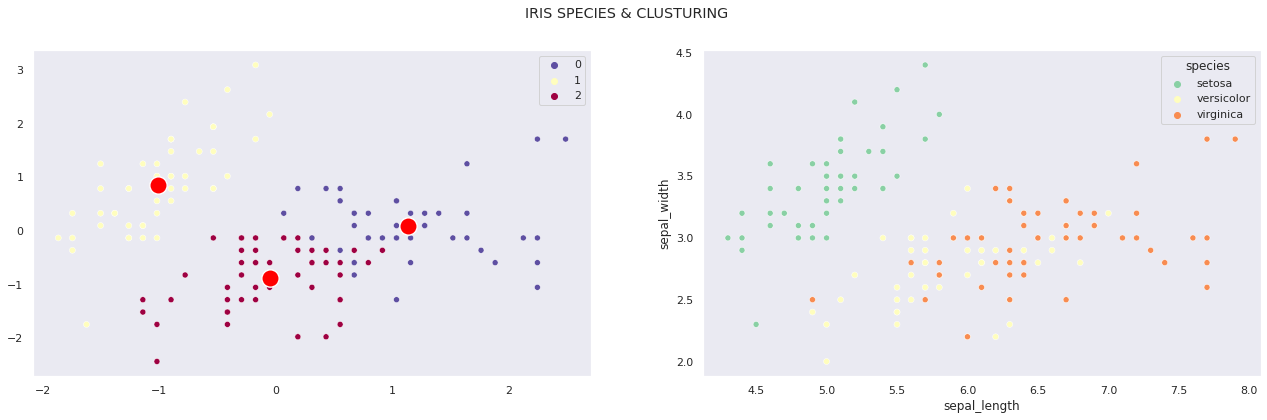

In [48]:
sns.set_theme(style='dark')
fig, axes = plt.subplots(1, 2, figsize=(22, 6))
fig.suptitle('IRIS SPECIES & CLUSTURING')

#GRAPH DE DROITE
sns.scatterplot(ax=axes[0], 
             data=X_scaled, 
             x= X_scaled[:,0], 
             y= X_scaled[:,1], 
             hue= modelKM.fit_predict(X_scaled), 
             palette='Spectral_r')
sns.scatterplot(ax=axes[0],
                x = modelKM.cluster_centers_[:,0], 
                y = modelKM.cluster_centers_[:,1], 
                color="red", s=300)
#GRAPH DE DROITE
sns.scatterplot(ax=axes[1], 
             data=df, 
             x='sepal_length', 
             y= 'sepal_width', 
             hue='species', 
             palette='Spectral_r')
plt.show()

4. Entraine un autre modèle sur 2 clusters, puis affiche les mêmes graphiques

In [53]:
#entrainement du modèle pour 2 clusters
modelKM = KMeans(n_clusters=2).fit(X_scaled)

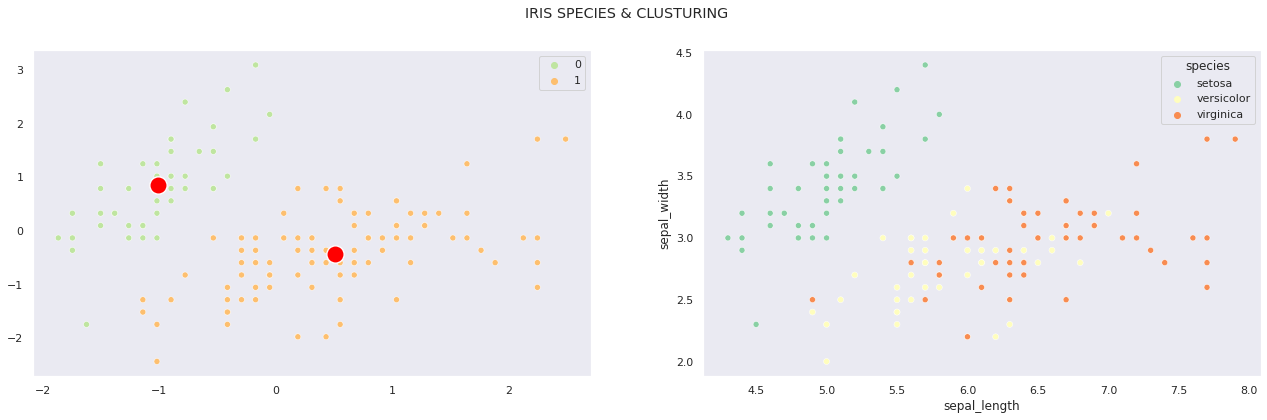

In [54]:
sns.set_theme(style='dark')
fig, axes = plt.subplots(1, 2, figsize=(22, 6))
fig.suptitle('IRIS SPECIES & CLUSTURING')

#GRAPH DE DROITE
sns.scatterplot(ax=axes[0], 
             data=X_scaled, 
             x= X_scaled[:,0], 
             y= X_scaled[:,1], 
             hue= modelKM.fit_predict(X_scaled), 
             palette='Spectral_r')
sns.scatterplot(ax=axes[0],
                x = modelKM.cluster_centers_[:,0], 
                y = modelKM.cluster_centers_[:,1], 
                color="red", s=300)
#GRAPH DE DROITE
sns.scatterplot(ax=axes[1], 
             data=df, 
             x='sepal_length', 
             y= 'sepal_width', 
             hue='species', 
             palette='Spectral_r')
plt.show()

5. Idem pour 4 clusters

In [55]:
#entrainement du modèle pour 4 clusters
modelKM = KMeans(n_clusters=4).fit(X_scaled)

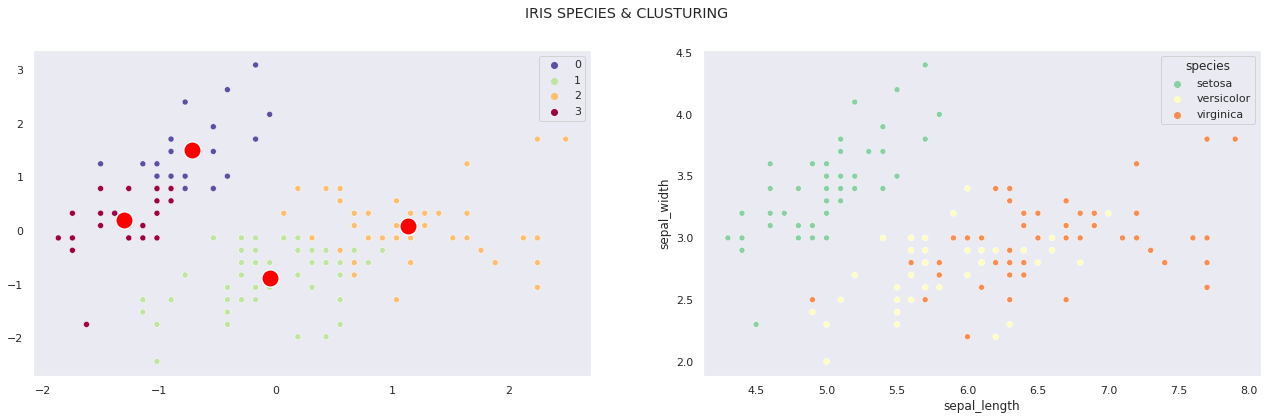

In [56]:
sns.set_theme(style='dark')
fig, axes = plt.subplots(1, 2, figsize=(22, 6))
fig.suptitle('IRIS SPECIES & CLUSTURING')

#GRAPH DE DROITE
sns.scatterplot(ax=axes[0], 
             data=X_scaled, 
             x= X_scaled[:,0], 
             y= X_scaled[:,1], 
             hue= modelKM.fit_predict(X_scaled), 
             palette='Spectral_r')
sns.scatterplot(ax=axes[0],
                x = modelKM.cluster_centers_[:,0], 
                y = modelKM.cluster_centers_[:,1], 
                color="red", s=300)
#GRAPH DE DROITE
sns.scatterplot(ax=axes[1], 
             data=df, 
             x='sepal_length', 
             y= 'sepal_width', 
             hue='species', 
             palette='Spectral_r')
plt.show()

6. Évalue ton modèle en utilisant la méthode Elbow, entre 2 et 10 clusters, quel nombre cluster semble optimal ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



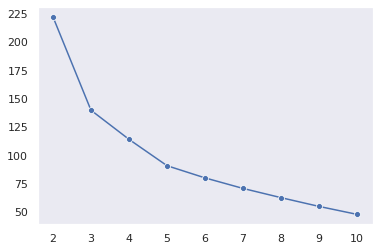

In [77]:
#méthode Elbow
listeDataElbow = []

for i in range(2,11):
  modelKM = KMeans(n_clusters=i, random_state=42).fit(X_scaled)
  listeDataElbow.append(modelKM.inertia_)

#Représentation
sns.lineplot(range(2,11), listeDataElbow, marker='o')
plt.show()

In [ ]:
#Le coude se situe à 3 clusters qui semble donc être le nombre de cluster idéal mais la coude n'est pas très 'franc'. 
#Essayons de changer le 'range' en commencant à 1...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



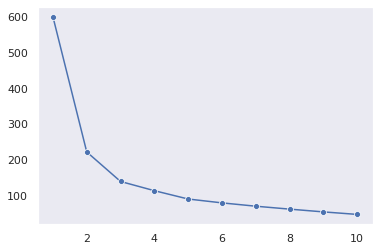

In [79]:
#méthode Elbow
listeDataElbow = []

for i in range(1,11):
  modelKM = KMeans(n_clusters=i, random_state=42).fit(X_scaled)
  listeDataElbow.append(modelKM.inertia_)

#Représentation
sns.lineplot(range(1,11), listeDataElbow, marker='o')
plt.show()

In [ ]:
#Le nombre de clusters idéal pourrait être 2 ou 3, ce qui est plus pertinent puisqu'il existe 3 espèces différentes d'Iris

7. Évalue ton modèle en utilisant la méthode Silhouette, entre 2 et 10 clusters, quel nombre de clusters semble optimal ? Et toi, visuellement, si tu ne savais pas qu'il y avait 3 espèces, tu en aurais trouvé combien ?

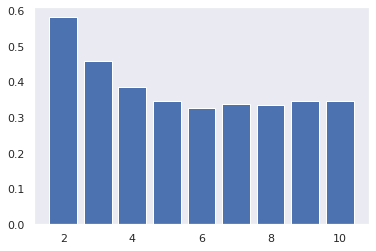

In [72]:
#Méthode silhouette
liste_silhouette_score = []
for k in range(2,11):
    modelKM = KMeans(n_clusters=k).fit(X_scaled)
    liste_silhouette_score.append(silhouette_score(X_scaled, modelKM.labels_))
#Représentation
plt.bar(range(2,11), liste_silhouette_score)
plt.show()

In [ ]:
#les résultats sont différents, le nombre de clusters qui obtient le meilleur score est cette fois ci de 2 avec la méthode silhouette

In [ ]:
#le résultat qui recoupe les 2 méthodes est 2, j'aurais donc dit qu'il y a 2 clusters différents